# Hate Tweet Classifier

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('sentiment_twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.shape

(31962, 3)

In [4]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Here, we have taken a dataset containing tweets from different people which are flagged/labelled as '0' or '1'. <br>
'0' specifies that the tweet doesn't contain any racist/sexist/abusive content whereas '1' flags tweets as derogatory <br> 
in racist/sexist/abusive manner.

In [5]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
df['label'].value_counts(normalize = True)

0    0.929854
1    0.070146
Name: label, dtype: float64

### Splitting the Dataset

Now, we'll split the data into training and testing. We'll aaply stratify on Label column so that train and test data contain equal ratio of 0s and 1s.

In [7]:
train_data, test_data = train_test_split(df, test_size = 0.1, random_state = 10, stratify = df['label'])

print('Train data size : ', train_data.shape)
print('Test data size : ', test_data.shape)

Train data size :  (28765, 3)
Test data size :  (3197, 3)


In [8]:
train_data[0:5]

,id,label,tweet
5269,5270,0,@user weâre mega to share our competition...
25832,25833,0,@user be so that people think you're a litt...
30918,30919,0,loving the about page! put some viva zing into...
8955,8956,0,4 days into #slimmingworld and im feeling much...
27785,27786,0,@user @user @user and here is exactly what's ...


In [9]:
test_data[0:5]

,id,label,tweet
27755,27756,0,my promise!!!ð look different today!! #self...
6078,6079,0,gearing up for the @user match @user @user #sa...
26810,26811,0,hero fathers with soothing assets #fathersday
26826,26827,0,"can't wait to be back where i belong, july can..."
22853,22854,0,foods for #healing your body!! #altwaystohe...


### Removing Stopwords and using TfidfVectorizer

<p>There are some workds in english language which frequently occur in a sentence or conversation.<br> 
These words are used only to formulate sentences bu tdo not provide any semantic meaning to it, <br>for eg.'the', 'a', 'are','you','these',etc. We call these words as <b>Stopwords</b> in ML/NLP language.<p/>
<b>TfidfVectorizer</b> is a sckit-learn class, which is used to transfrom text into feature vectors, which
then can be used as input estimator. Each sentence is a vector, the sentences entered are matrix
with 3 vectors. In each vector the numbers (weights) represent features tf-idf score. Now, <b>TF (Term Frequency) Score</b>is the number of times a word appears in a document divded by the total number of words in the document whereas <b> IDF (Inverse Data Frequency) Score</b> is the log of the number of documents divided by the number of documents that contain the word . IDF determines the weight of rare words across all documents.

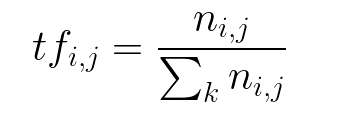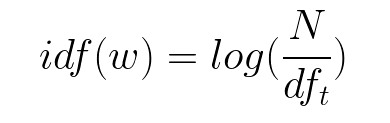

In [10]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vectorizer = TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, lowercase = True, tokenizer = None, max_features = 1000)

In [12]:
vectorizer.fit(train_data['tweet'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, sublinear_tf=False,
                token_pa

In [13]:
# finding IDF Score for Train and test data

idf_train = vectorizer.transform(train_data['tweet'])
idf_test = vectorizer.transform(test_data['tweet'])

### Logistic Regression Model

In [14]:
model = LogisticRegression(C = 1, solver = 'lbfgs')

model.fit(idf_train, train_data['label'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### SVM

In [15]:
from sklearn import svm

model_svm = svm.SVC(kernel = 'rbf')
model_svm.fit(idf_train, train_data['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(idf_train,train_data['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Pipelining

In [17]:
pipe_logistic = Pipeline(steps= [('vectorizer', TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, 
                                                           lowercase = True, tokenizer = None, 
                                                           max_features = 1000)),
                            ('model_logistic', LogisticRegression(C = 1, 
                                                         solver = 'lbfgs'))])

pipe_svm = Pipeline(steps= [('vectorizer_svm', TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, 
                                                           lowercase = True, tokenizer = None, 
                                                           max_features = 1000)),
                            ('model_svm', svm.SVC(kernel = 'rbf'))])

pipe_nb = Pipeline(steps= [('vectorizer_nb', TfidfVectorizer(stop_words = ENGLISH_STOP_WORDS, 
                                                           lowercase = True, tokenizer = None, 
                                                           max_features = 1000)),
                            ('model_nb', MultinomialNB())])

In [18]:
pipe_logistic.fit(train_data['tweet'], train_data['label'])
pipe_svm.fit(train_data['tweet'], train_data['label'])
pipe_nb.fit(train_data['tweet'], train_data['label'])

Pipeline(memory=None,
         steps=[('vectorizer_nb',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'a...
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                       

In [19]:
pred_svm = pipe_svm.predict(train_data['tweet'])
pred_nb = pipe_nb.predict(train_data['tweet'])
from sklearn import metrics
print(metrics.f1_score(train_data['label'], pred_svm))
print(metrics.f1_score(train_data['label'], pred_nb))

0.6658056183403294
0.4033295497540673


#### Svm is giving higher F1 score, so we'll use SVM for project

In [20]:
test_text = ["Congratulations, Narendra Modi for winning General elections of India"]
if pipe_svm.predict(test_text) == 1:
    print('This tweet contains objectionable content')
else:
    print('Your tweet is good to go!!')

Your tweet is good to go!!


### Saving and Reusing
Now, we'll save our trained model in a file using dump() so that we can reuse it. We won't use pickle here.<br>
Instead, we will use jolib as it is faster and works good with Python objects

In [21]:
from joblib import dump

dump(pipe_svm, filename = 'Tweet_classifier.joblib')

['Tweet_classifier.joblib']